### №1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

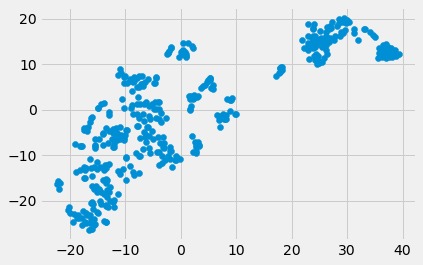

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### №2

In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

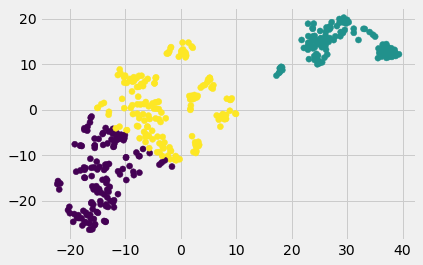

In [9]:
labels_train = model.fit_predict(X_train_tsne)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [10]:
print('Кластер 0 CRIM: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1 CRIM: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2 CRIM: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))
print('Кластер 0 Price: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1 Price: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2 Price: {}'.format(y_train[labels_train == 2].mean()))

Кластер 0 CRIM: 0.09462279411764711
Кластер 1 CRIM: 13.17982178217822
Кластер 2 CRIM: 0.6829679640718564
Кластер 0 Price: 26.564705882352943
Кластер 1 Price: 16.277227722772277
Кластер 2 Price: 23.67065868263473


### №3

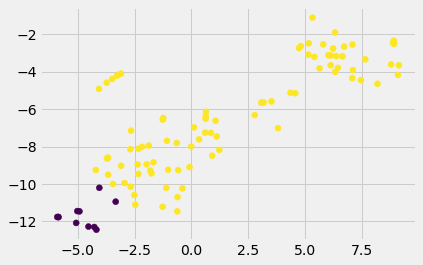

In [11]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
labels_test = model.predict(X_test_tsne)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [12]:
np.unique(labels_test)

array([0, 2])

In [13]:
print('Кластер 0 CRIM: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 2 CRIM: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))
print('Кластер 0 Price: {}'.format(y_test[labels_test == 0].mean()))
print('Кластер 2 Price: {}'.format(y_test[labels_test == 2].mean()))

Кластер 0 CRIM: 0.052055454545454544
Кластер 2 CRIM: 4.063560000000001
Кластер 0 Price: 32.99090909090909
Кластер 2 Price: 20.0978021978022
